<a href="https://colab.research.google.com/github/Osman-Geomatics93/KTU_DIM023_K_Mean_Clustering/blob/main/download_imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geedim

In [21]:
import geedim
import geemap
import geopandas as gpd

In [22]:
geemap.ee_initialize()

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
gdf = gpd.read_file("/content/drive/MyDrive/Google Culab/Gezira irrigation scheme/GIS_Boundary/GIS_JSON.json")
gdf.head()

,FID,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,geometry
0,0,0,Placemark,gezira.kmz,0,0,0.0,-1,0,,,7.226106,0.978187,"POLYGON ((486307.770 1685568.334, 488117.702 1..."


<Axes: >

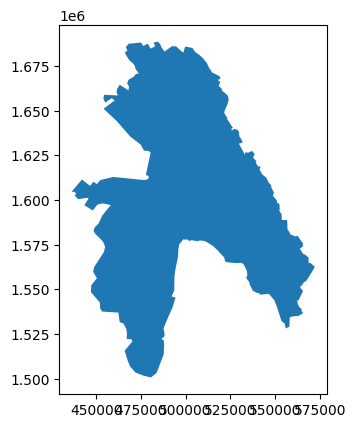

In [38]:
gdf.plot()

In [39]:
ee_aoi = geemap.geopandas_to_ee(gdf)
print(ee_aoi)

ee.FeatureCollection({
  "functionInvocationValue": {
    "functionName": "Collection",
    "arguments": {
      "features": {
        "arrayValue": {
          "values": [
            {
              "functionInvocationValue": {
                "functionName": "Feature",
                "arguments": {
                  "geometry": {
                    "functionInvocationValue": {
                      "functionName": "GeometryConstructors.Polygon",
                      "arguments": {
                        "coordinates": {
                          "constantValue": [
                            [
                              [
                                32.87249225600006,
                                15.246265335003084
                              ],
                              [
                                32.88935911500006,
                                15.223228365003058
                              ],
                              [
                          

In [40]:
image_collection = "LANDSAT/LC08/C02/T1_L2"
start_date = '2020-02-01'
end_date = '2020-10-10'
cloud_cover = 10
scale = 30
dtype = 'float32'
crs = 'EPSG:4326'

In [41]:
import ee
dataset = ee.ImageCollection(image_collection)\
            .filterDate(start_date, end_date)\
            .filterBounds(ee_aoi)\
            .filter(ee.Filter.lt('CLOUD_COVER', cloud_cover))

dataset = dataset.median().select(['SR_B4', 'SR_B3', 'SR_B2']).clip(ee_aoi)

In [42]:
geemap.download_ee_image(
            dataset,
            scale=30,
            filename='/content/landsat8_ktm.tif',
            dtype='float32',
            region=ee_aoi.geometry(),
            crs=crs
        )

landsat8_ktm.tif: |          | 0.00/355M (raw) [  0.0%] in 00:00 (eta:     ?)

There is no STAC entry for: None
